### **Tasks**
1. Load each dataset and preprocess if necessary (scaling for numeric data, train-test split).
2. Train all 5 classifiers on each dataset.
3. Use cross-validation (cv=5) to compute accuracy scores.
4. Collect results into a pandas DataFrame.
5. For each dataset, draw a box plot comparing classifier performance.
6. Identify which classifier performs best for each dataset and explain why (based on assumptions).

In [ ]:
from sklearn.datasets import load_iris, load_wine, make_moons, make_classification, fetch_20newsgroups_vectorized, fetch_20newsgroups
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
def perform_cross_validation(x, y, cv=5, is_sparse_matrix=False):
    if is_sparse_matrix:
       x = x.toarray()
       models = {
            'LR': LogisticRegression(max_iter=100),
            'KNN': KNeighborsClassifier(),
            'GNB': MultinomialNB(),
            'LDA': LinearDiscriminantAnalysis(),
            'QDA': QuadraticDiscriminantAnalysis(reg_param=1.0)
        }
    else:
        models = {
            'LR': make_pipeline(StandardScaler(), LogisticRegression()),
            'KNN': make_pipeline(StandardScaler(), KNeighborsClassifier()),
            'LDA': make_pipeline(StandardScaler(), LinearDiscriminantAnalysis()),
            'GNB': make_pipeline(StandardScaler(), GaussianNB()),
            'QDA': make_pipeline(StandardScaler(), QuadraticDiscriminantAnalysis())
        }

    results = []

    for name, model in models.items():
        scores = cross_val_score(model, x, y, cv=cv, scoring='accuracy')
        for score in scores:
            results.append({'Model': name, 'Accuracy': score})

    df_results = pd.DataFrame(results)
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Model', y='Accuracy', data=df_results)
    sns.stripplot(x='Model', y='Accuracy', data=df_results, color='black', alpha=0.5)
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

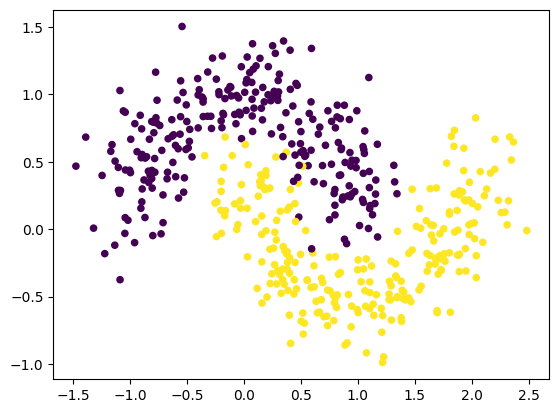

In [4]:
# Dataset - Scenario 1
moons_x, moons_y = make_moons(n_samples=500, noise=0.2, random_state=42) # random_state for reproducibility
plt.scatter(moons_x[:, 0], moons_x[:, 1], c=moons_y, s=20, cmap='viridis')

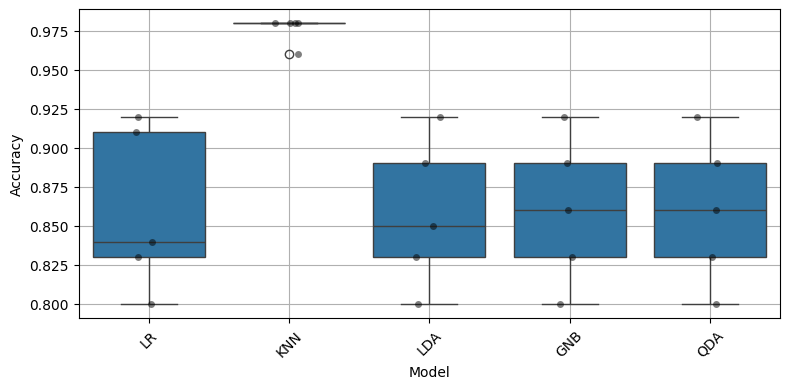

In [6]:
perform_cross_validation(moons_x, moons_y)

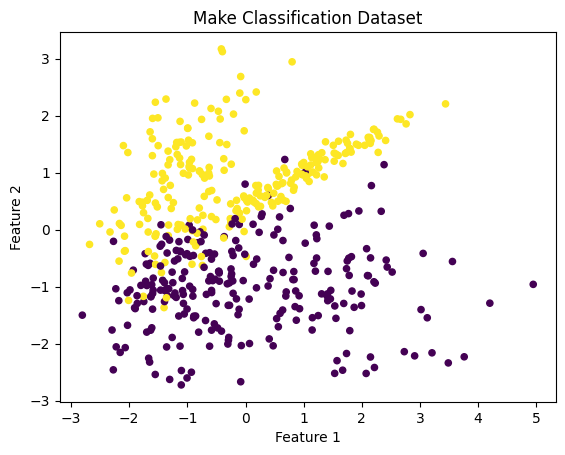

In [ ]:
# Dataset - Scenario 2
clf_x, clf_y =  make_classification(n_samples=500, n_features=2, n_classes=2, n_informative=2, n_redundant=0)
plt.scatter(clf_x[:, 0], clf_x[:, 1], c=clf_y, s=20, cmap='viridis')
plt.title("Make Classification Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

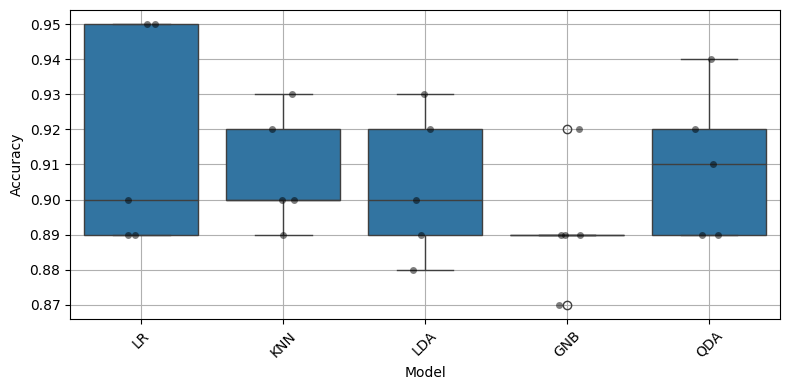

In [26]:
perform_cross_validation(clf_x, clf_y)

C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\saran\AppData\Roaming\Python\Python313\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of param

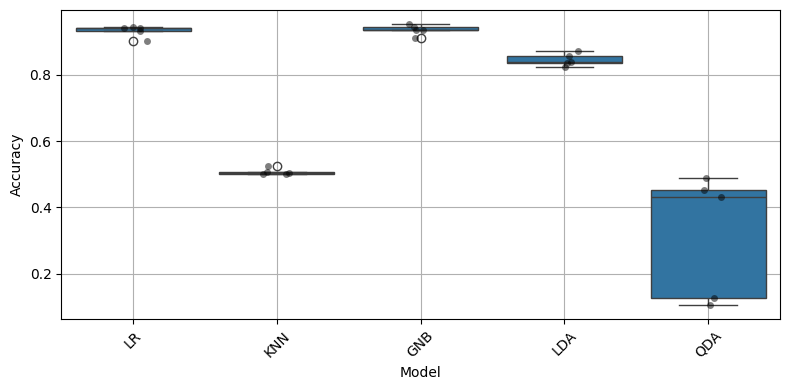

In [16]:
news = fetch_20newsgroups(subset='train',categories =['sci.space','rec.autos'],remove=('headers','footers','quotes'))
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
news_x = vectorizer.fit_transform(news.data)
news_y = news.target

perform_cross_validation(news_x, news_y, is_sparse_matrix=True)

In [13]:
# Dataset - Scenario 4
iris_ds = load_iris()
iris_x, iris_y = iris_ds.data, iris_ds.target
iris_class_labels = iris_ds.target_names
print(iris_x[0:5])
print(iris_y[0:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [14]:
df = pd.DataFrame(iris_x, columns=['x1', 'x2', 'x3', 'x4'])
print(df.corr())

          x1        x2        x3        x4
x1  1.000000 -0.117570  0.871754  0.817941
x2 -0.117570  1.000000 -0.428440 -0.366126
x3  0.871754 -0.428440  1.000000  0.962865
x4  0.817941 -0.366126  0.962865  1.000000


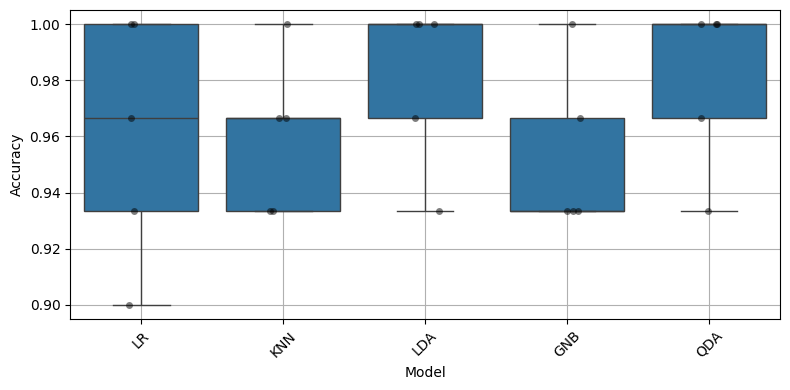

In [16]:
perform_cross_validation(iris_x, iris_y)

In [27]:
# Dataset - Scenario 5s
wine_ds = load_wine()
wine_x, wine_y = wine_ds.data, wine_ds.target
wine_class_labels = wine_ds.target_names
print(wine_x[0:5])
print(wine_y[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]


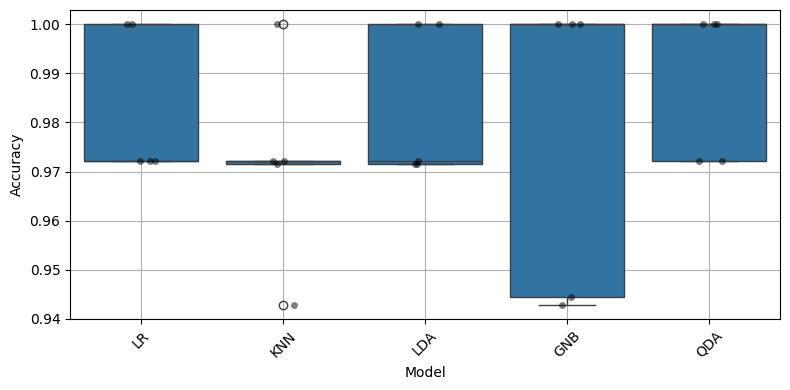

In [ ]:
perform_cross_validation(wine_x, wine_y)

### **Task 6: Identify which classifier performs best for each dataset and explain why (based on assumptions)**

In `Moons` Dataset (Scenario - 1), `K-Nearest Neighbour` performs the best (Because of the complexity & curved structure that other model cannot help).

Reasoning:
* Both classes in the dataset forms a crescent which is curved. so cannot linearly separable. Therefore, Logistic regression and linear Discriminant Analysis didn't work well and its accuracy is too low.
* The moons dataset are not bell-shaped or symmetric instead curved. So Gaussian Naive bayes and Quadratic Discriminant Analysis didn't work well and its accuracy is too low as well.
* K-Nearest Neighbour uses local structure of the dataset. so it's accuracy is much higher than than others.

----

In `Synthetic` Dataset (Scenario - 2), `Logistic Regression` performs the best (Linearly Separable).

Reasoning:
* The dataset is linearly separable and has two simple features as we could find in the scatter plot. So Logistic regression has highest accuracy than others. 
* There is a class overlap and Gaussian Naive Bayes is sensitive to this class overlap because its purely probabilistic. So Gaussian NB has lower accuracy.
* KNN does local comparisons. So it can misclassify datapoints on the boundaries if the data on the other side of the boundary line closer to new data points.

----

In `News` Dataset (Scenario - 3), `LDA` performs the best (Linearly Separable and suits for high-dimensional data).

Reasoning:
* A text-based vectorized dataset often has a linear relationship between features (words) and classes (news categories). So LDA and LR performs better than other models, which is also suitable for high-dimensional data.
* This is a high-dimensional data. So as the number of features increases, the distance becomes less meaningful. So knn struggles to classify accurately.
* Gaussian Naive bayes again struggles because of its assumption of feature independence.

---

In `Iris` Dataset (Scenario - 4), `LDA` performs the best (low number of features with sufficient samples).

Reasoning:
* LDA works the best because of the simplicity, Gaussian Distribution which allow LDA to model PDF of each classes separately and has similar covariance for all classes.
* The simplicity and clear boundaries of iris dataset makes LR and QDA work good.
* KNN struggles in classifying boundry data points
* Gaussian NB struggles a bit because some features are highly correlated as we could see in the corr() method results.

----

In `Wine` Dataset (Scenario - 5), `QDA` performs the best (Different covariances for each class and gaussian distribution in dataset).

Reasoning:
* QDA's core assumption is that each class has its own separate Gaussian distribution with its own unique covariance matrix. So, QDA is perfectly suited to model the data and accurately classify the samples, leading to its high performance.
* The simplicity and clear boundaries of Wine dataset makes LR and LDA outperform.
* KNN also performs well because less number of features makes the distance meaningful.
* For the wine dataset, features like "total phenols" and "flavanoids" are likely highly correlated, and GNB's "naive" assumption struggles to handle this. So Gaussian Naive Bayes has large margin and performs the worst.